In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# 🔹 Step 1: Load dataset


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


# 🔹 Step 2: Drop unnecessary columns


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.shape

(10000, 11)

# 🔹 Step 3: Encode categorical features (Geography, Gender)


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
le_gender=LabelEncoder()
df['Gender']=le_gender.fit_transform(df['Gender'])   # Gender: Female -> 0, Male -> 1
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
ohe_geography = OneHotEncoder(drop='first')
geo_encoded = ohe_geography.fit_transform(df[['Geography']]).toarray()
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
geo_encoded_df = pd.DataFrame(geo_encoded, columns=ohe_geography.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_Germany,Geography_Spain
0,0.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
9995,0.0,0.0
9996,0.0,0.0
9997,0.0,0.0
9998,1.0,0.0


In [ ]:
df = pd.concat([df.drop(columns=['Geography']), geo_encoded_df], axis=1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  float64
 11  Geography_Spain    10000 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 937.6 KB


Necessary EDA (basic descriptive statistics) Exploratory Data Analysis

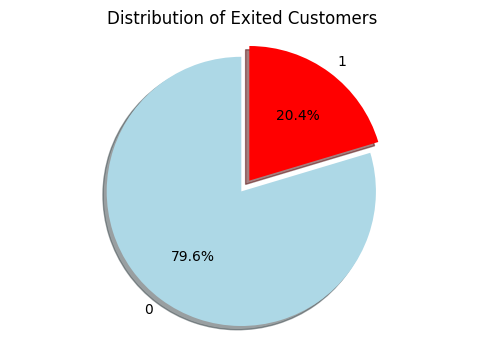

In [ ]:
exited_counts = df['Exited'].value_counts()

plt.figure(figsize=(6, 4))

plt.pie(exited_counts,
        labels=exited_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightblue', 'red'],
        explode = (0, 0.1),
        shadow=True)

plt.title('Distribution of Exited Customers')
plt.axis('equal')
plt.show()

In [ ]:
df.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,-0.024628,0.016889
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667


In [ ]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


Splitting features and target

In [ ]:
x=df.drop(columns=['Exited'],axis=1)
y=df['Exited']

In [ ]:
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,1.0


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


Split dataset into 70% train and 30% test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
9069,619,0,32,4,175406.13,2,1,1,172792.43,0.0,1.0
2603,643,0,34,7,160426.07,1,0,1,188533.11,1.0,0.0
7738,561,1,33,6,0.00,2,0,0,173680.39,0.0,0.0
1579,618,1,41,8,37702.79,1,1,1,195775.48,1.0,0.0
5058,714,1,37,9,148466.93,2,0,1,151280.96,0.0,0.0


In [ ]:
y_train.head()

,Exited
9069,1
2603,0
7738,0
1579,0
5058,0


In [ ]:
x_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
6252,596,1,32,3,96709.07,2,0,0,41788.37,1.0,0.0
4684,623,1,43,1,0.00,2,1,1,146379.30,0.0,0.0
1731,601,0,44,4,0.00,2,1,0,58561.31,0.0,1.0
4742,506,1,59,8,119152.10,2,1,1,170679.74,1.0,0.0
4521,560,0,27,7,124995.98,1,1,1,114669.79,0.0,1.0


In [ ]:
y_test

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
...,...
8014,0
1074,0
3063,0
6487,0


In [ ]:
x_train.shape

(7000, 11)

In [ ]:
y_train.shape

(7000,)

In [ ]:
x_test.shape

(3000, 11)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test, y_pred)

0.806

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2416
           1       0.50      0.52      0.51       584

    accuracy                           0.81      3000
   macro avg       0.69      0.70      0.70      3000
weighted avg       0.81      0.81      0.81      3000



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2112,  304],
       [ 278,  306]])

In [ ]:
# Accuracy=TP+TN/TP+TN+FP+FN
 (2122+306)/(2122+306+294+278)

IndentationError: unexpected indent (ipython-input-110-1975465304.py, line 2)

In [ ]:
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])

fig = px.imshow(cm_df,
                text_auto=True,
                color_continuous_scale="Viridis",
                title="Confusion Matrix")

fig.update_layout(
    title={
        'text': "Confusion Matrix",
        'x': 0.5,
        'xanchor': 'center'
    },

    xaxis_title="Predicted Label",
    yaxis_title="True Label",
    coloraxis_showscale=True
)
fig.show()